# Project Overview
This project aims to analyze and draw insights from the given dataset. The following sections are structured to guide you through the data preprocessing, analysis, and modeling phases, culminating in a comprehensive conclusion.

## Objective
The primary objective of this project is to [Objective Here].

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv("diamonds.csv")

# Display the first few rows of the DataFrame
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   log_price     volume  
0   5.786897  38.202030  
1   5.786897  34.505856  
2   5.789960  38.076885  
3   5.811141  46.724580  
4   5.814131  51.917250  


In [4]:
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'log_price', 'volume'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  log_price  53940 non-null  float64
 11  volume     53940 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
log_price    0
volume       0
dtype: int64


In [7]:
# Find duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If you decide to remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 146


In [8]:
# Find duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If you decide to remove duplicates
df = df.drop_duplicates()

# Check again for duplicate rows after removal
duplicate_rows_after_removal = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after_removal}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [9]:
# Check data types
print(df.dtypes)

carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
log_price    float64
volume       float64
dtype: object


In [10]:
# Check unique values for a categorical column
print(df['cut'].unique())

# Correct inconsistencies if needed
# df['cut'] = df['cut'].replace({'IncorrectValue': 'CorrectValue'})

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [11]:
df.describe()

,carat,depth,table,price,x,y,z,log_price,volume
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,7.787138,129.826975
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,1.014439,78.160819
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.786897,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,6.857514,65.190168
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,7.783641,114.840180
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,8.580497,170.823600
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,9.842835,3840.598060


## Analysis Step
Zero Values in Dimensions: The 'x', 'y', and 'z' columns represent the physical dimensions of diamonds. The minimum value for these columns is 0, which is not possible for a physical object. These are likely to be errors in the data.

Zero Volume: Given that volume is typically calculated as the product of 'x', 'y', and 'z', any zero value in these dimensions would result in a volume of 0, which is again not possible for a physical object.

Extreme Maximum Values: The maximum values for 'carat' and 'price' are substantially higher than the 75th percentile values, suggesting potential outliers. For example, the max 'carat' is 5.01 while the 75th percentile is just 1.04, and the max 'price' is 18,823 while the 75th percentile is 5,326.75. These could be legitimate high-value transactions or errors; further investigation is needed.

Large Standard Deviations: For 'price', 'carat', and the dimensions, the standard deviations are quite large relative to the means, indicating a wide distribution of values that could be due to a range of diamond sizes and qualities or could indicate variability in data quality.

Physical Improbability: The maximum 'z' dimension is 31.8, which is quite large compared to the maximum 'x' and 'y' dimensions (10.74 and 58.9, respectively). This could be a data entry error or a very unusually shaped diamond.

These anomalies would typically warrant a closer examination of individual records in the dataset to determine whether they represent errors or rare but valid cases. Data visualization, further statistical analysis, and possibly consultation with domain experts would be part of a thorough anomaly detection and resolution process.


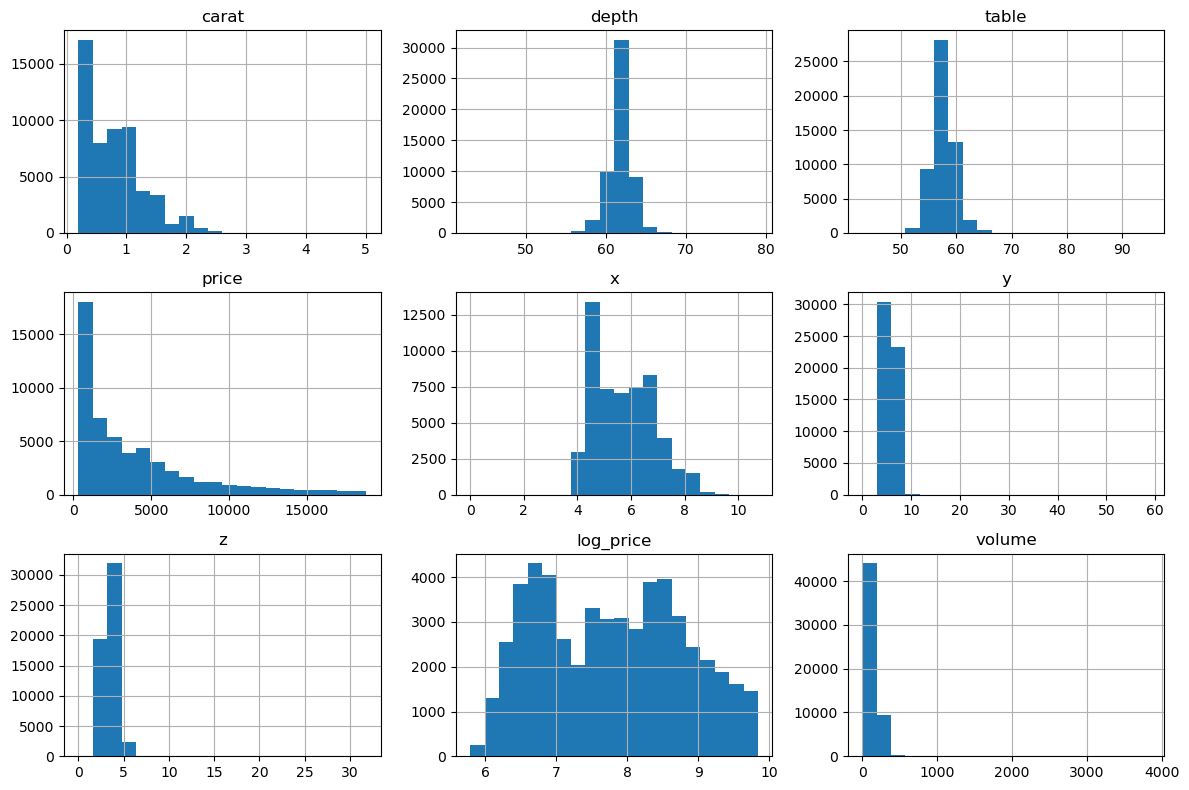

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_to_plot = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

# Plot histograms for each column
df[columns_to_plot].hist(bins=20, figsize=(12, 8))
plt.tight_layout()  # Adjust layout to prevent overlap of histograms
plt.show()


## Analysis Step
Carat: The histogram is right-skewed, indicating that the data is not normally distributed. There is a high concentration of values at the lower end, with a long tail towards higher carat values.

Depth: This histogram appears to be somewhat bell-shaped but with sharp peaks, suggesting it may have a normal distribution; however, the sharpness of the peak and slight left skew indicate it might not be perfectly normal.

Table: Similar to depth, the histogram has a bell shape with a sharp peak. It's closer to a normal distribution than carat, but the peak suggests it might not be perfectly normal.

Price: The histogram is highly right-skewed, with a concentration of data at the lower end and a long tail extending to the right, indicating it is not normally distributed.

X (Length): This distribution is right-skewed with a peak at the lower end, suggesting it is not normally distributed.

Y (Width): The histogram shows a right skew, but there is an unusual spike at a higher value, which could be due to outliers or incorrect data entries; thus, it is not normally distributed.

Z (Depth): The histogram is right-skewed, similar to 'x' and 'y', and is not normally distributed. There is also a tail that suggests the presence of outliers or errors.

Log Price: The histogram for log_price looks closer to a normal distribution than the price histogram, with a more symmetrical bell shape, but it still appears slightly right-skewed, indicating it may not be perfectly normal.

Volume: The histogram is right-skewed with a peak at the lower end, indicating a non-normal distribution.

In summary, none of the variables show a perfectly normal distribution in their histograms. The 'depth' and 'table' histograms appear to be the most symmetric and bell-shaped, but the sharp peaks and skewness in other variables suggest that they are not normally distributed. The 'x', 'y', 'z', 'carat', 'price', and 'volume' histograms all show right-skewness, indicative of a larger number of lower values and fewer high values, which is common in datasets dealing with physical measurements and pricing where a few high-value items can skew the distribution.








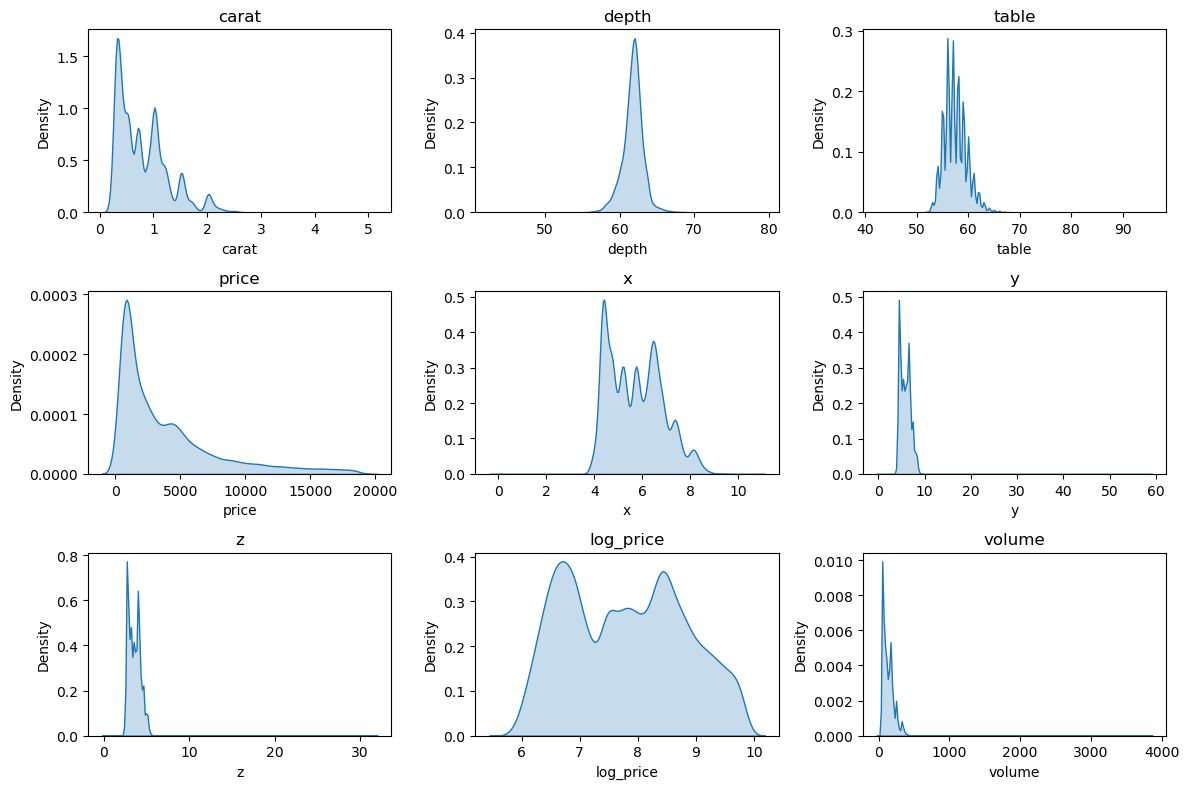

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is typically used for KDE plots

# Assuming 'df' is your DataFrame
columns_to_plot = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust the size to fit your screen or preferences

# Iterate through the list of columns and create a KDE plot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(data=df, x=column, fill=True)  # Use 'fill' instead of 'shade'
    plt.title(column)

plt.tight_layout()  # Adjust the layout
plt.show()



## Analysis Step
conclusions - 

In the Kernel Density Estimate (KDE) plots provided, we can observe the following:

Carat: The distribution is heavily skewed to the right, with most of the data concentrated at lower carat values and a long tail towards higher values. This indicates a higher frequency of smaller diamonds compared to larger ones.

Depth: The distribution is relatively more symmetrical and bell-shaped, centering around a depth that is likely close to the mean or median of the data. However, there are visible spikes, suggesting some specific depth measurements are more common.

Table: The KDE plot for table size also shows a bell-shaped curve but with a narrower peak, indicating that the data clusters around a common table size with less variability than depth.

Price: The price distribution is very right-skewed, showing that lower prices are far more common than higher ones, with a very long tail extending towards higher prices.

X (Length): There is right-skewness with multiple peaks in the distribution, suggesting the presence of subgroups within the data or certain standard sizes that are more frequent.

Y (Width): The distribution shows a significant spike at lower values with a long right tail, similar to 'x', and also has an extremely high peak, which could be due to a concentration of diamonds with similar widths or data errors.

Z (Depth): The distribution is heavily skewed to the right with several peaks at lower values, indicating potential subgroups or standard depth measurements.

Log Price: The KDE plot shows a bimodal distribution with two peaks. This could mean there are two common price ranges where diamonds are concentrated.

Volume: The volume has a right-skewed distribution with a peak at lower values, similar to 'x', 'y', 'z', and price. The tail extends far to the right, suggesting some diamonds with much larger volumes.

These observations suggest that most of the variables are not normally distributed, with many exhibiting right-skewness, indicating the prevalence of smaller values. The bimodal distribution in log_price is particularly interesting and may reflect different segments in the diamond market. Additionally, the multiple peaks seen in dimensions and depth could imply standardized cuts or sizes that are more common. The sharp peaks in certain variables hint at potential errors or data entry issues, especially in the 'y' and 'z' dimensions, where the peaks are exceptionally sharp and far from the rest of the data distribution.

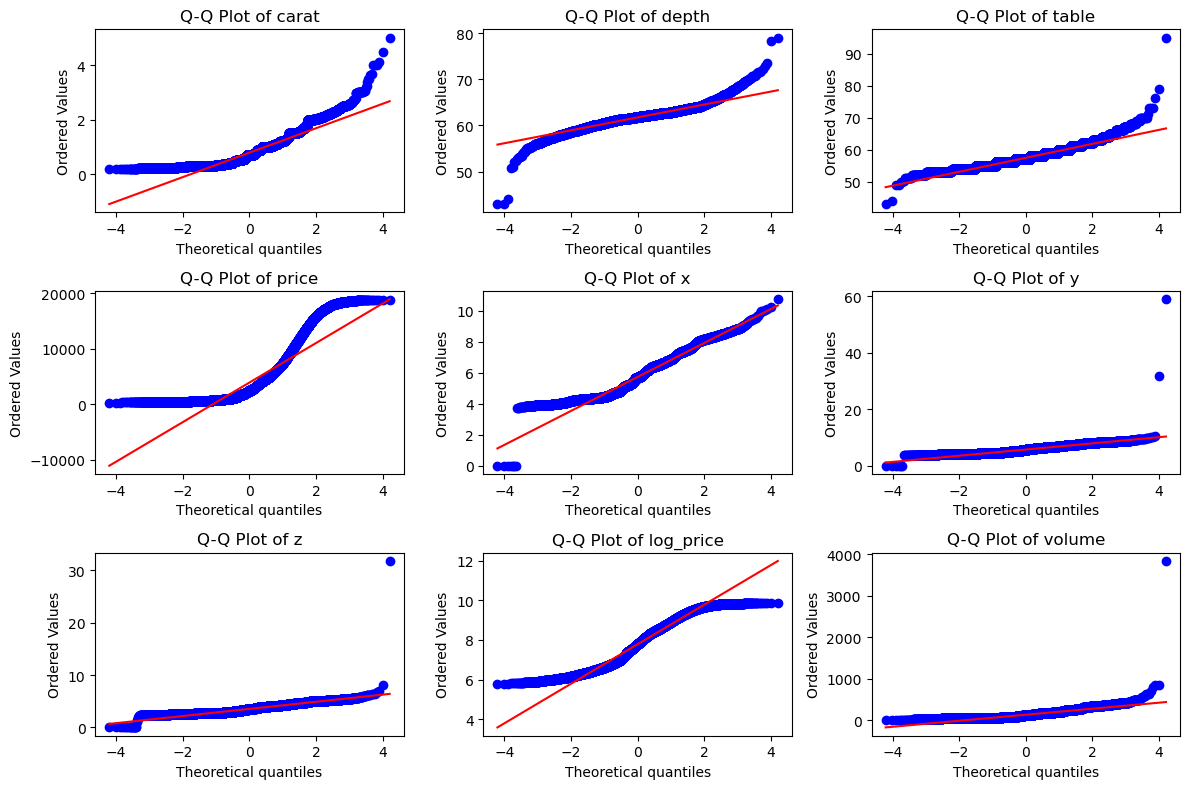

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'df' is your DataFrame
columns_to_plot = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust the size to fit your screen or preferences

# Iterate through the list of columns and create a Q-Q plot for each
for i, column in enumerate(columns_to_plot):
    ax = plt.subplot(n_rows, n_cols, i+1)
    stats.probplot(df[column], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot of {column}')
    ax.get_lines()[1].set_color('red')  # Set the line color to red for visibility

plt.tight_layout()  # Adjust the layout
plt.show()


In [15]:
# Assuming df is your DataFrame
selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

skewness_selected = df[selected_columns].skew()

print("Skewness for selected columns:")
print(skewness_selected)



Skewness for selected columns:
carat        1.113651
depth       -0.114250
table        0.792227
price        1.618240
x            0.379624
y            2.445768
z            1.529023
log_price    0.114315
volume       3.048210
dtype: float64


## Analysis Step
carat: 1.113651 (right-skewed)
depth: -0.114250 (slightly left-skewed)
table: 0.792227 (right-skewed)
price: 1.618240 (right-skewed)
x: 0.379624 (right-skewed)
y: 2.445768 (strongly right-skewed)
z: 1.529023 (right-skewed)
log_price: 0.114315 (slightly right-skewed)
volume: 3.048210 (strongly right-skewed)

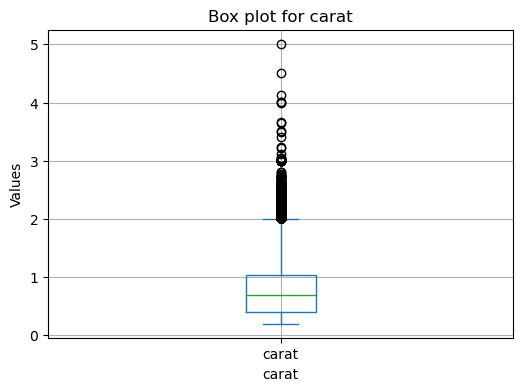

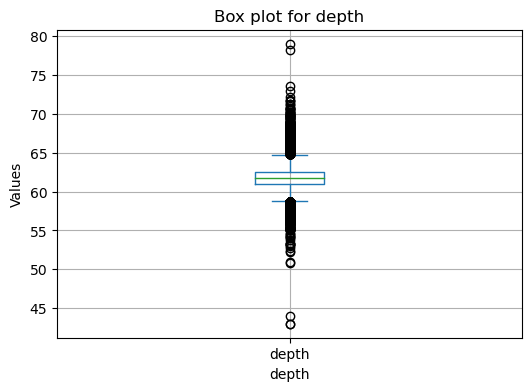

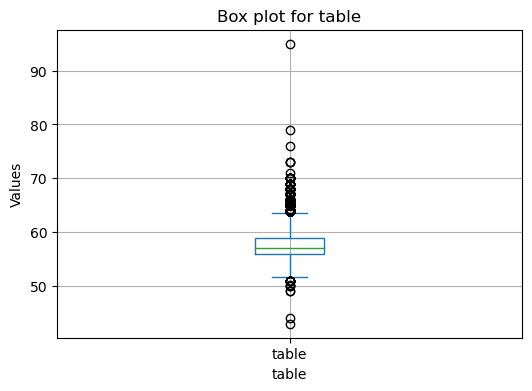

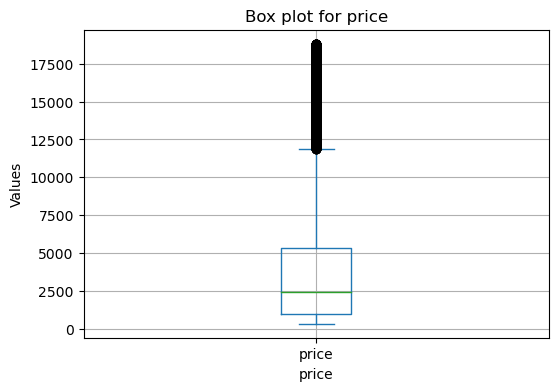

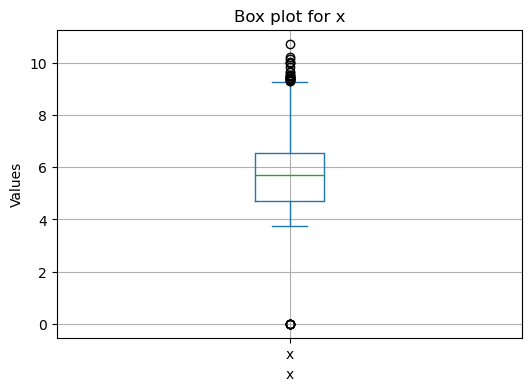

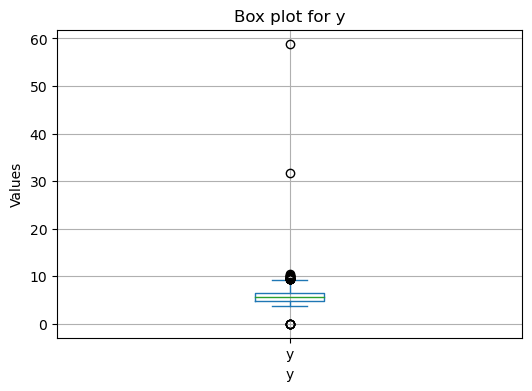

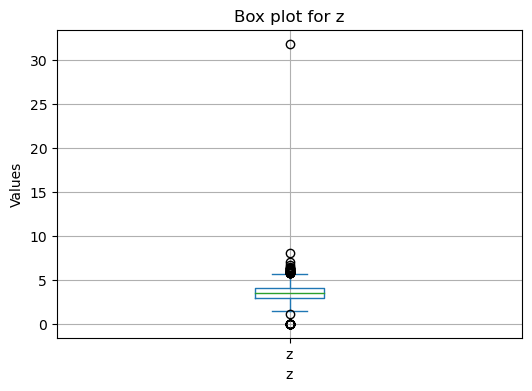

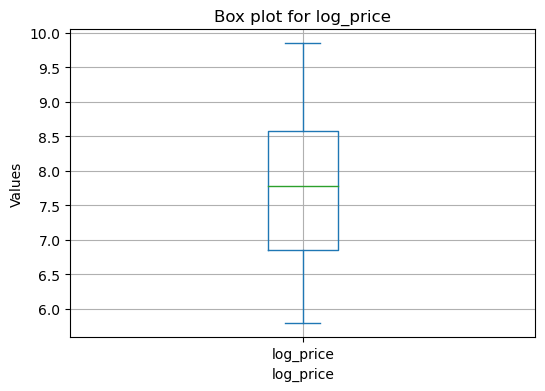

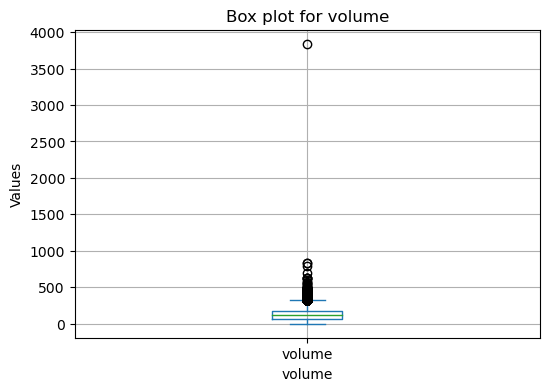

In [16]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

# Create separate box plots for each column
for col in selected_columns:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='box')
    plt.title(f'Box plot for {col}')
    plt.ylabel('Values')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


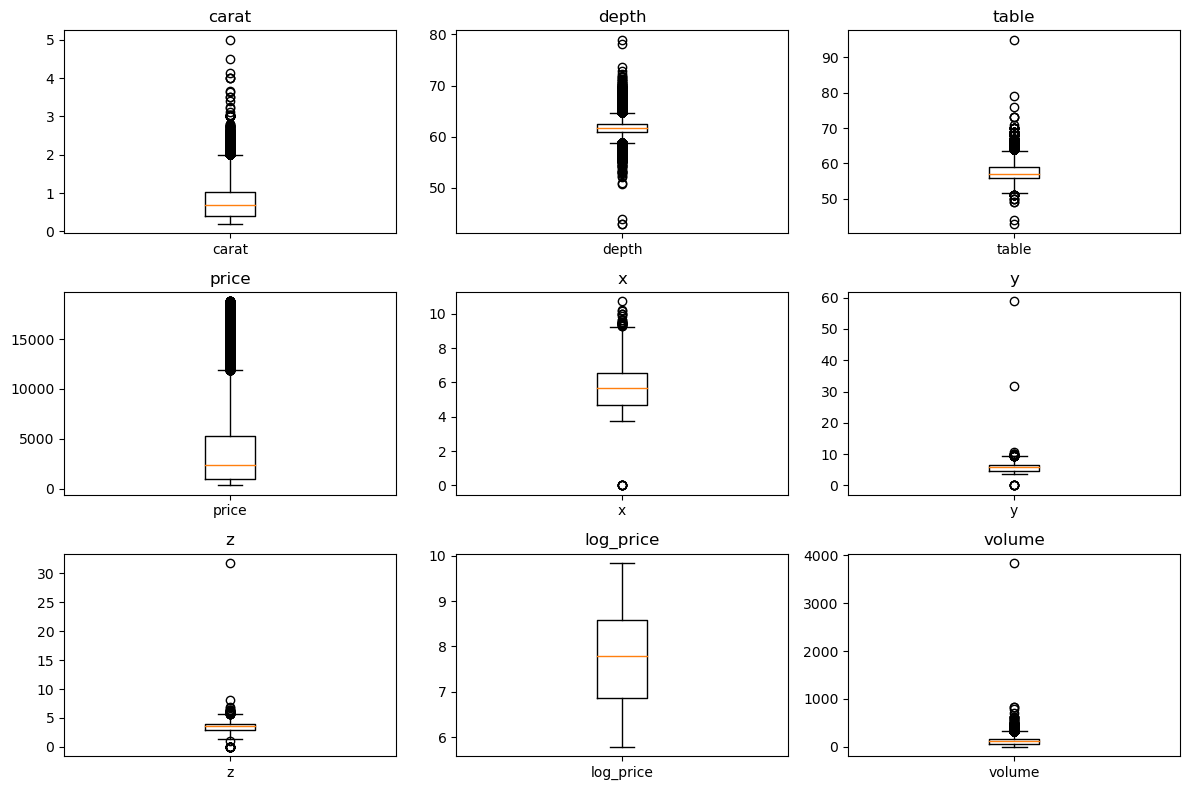

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
columns_to_plot = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'log_price', 'volume']

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Set up the matplotlib figure
plt.figure(figsize=(12,8))  # Adjust the size to fit your screen or preferences

# Iterate through the list of columns and create a boxplot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df[column].dropna())  # Drop NA values for boxplot
    plt.title(column)
    plt.xticks([1], [column])  # Set the x-ticks to the name of the column

plt.tight_layout()  # Adjust the layout
plt.show()


## Analysis Step
The boxplots reveal information about the distribution of each variable, particularly the presence of outliers:

Carat: There are many points above the upper whisker, indicating a substantial number of outliers with higher carat values.

Depth: A few outliers are present on both ends, but particularly there are a few above the upper whisker that suggest some diamonds have an unusually high depth percentage.

Table: Several outliers are noted above the upper whisker, indicating some diamonds have larger table percentages than is typical for the bulk of the data.

Price: There's a very large number of outliers above the upper whisker, which points to a significant number of diamonds being priced much higher than the central tendency of the dataset.

X (Length): Outliers are present above the upper whisker, indicating some diamonds are much longer than the typical range in the dataset.

Y (Width): There is a concentration of outliers at the higher end, with a few extreme values indicating some diamonds are much wider than average.

Z (Depth): Similar to 'x' and 'y', there are outliers above the upper whisker, with a few extreme values suggesting some diamonds have a much greater depth than the rest.

Log Price: There are outliers on both ends of the plot, but especially above the upper whisker, reflecting that even after log transformation, there is a significant variation in diamond prices, with some much higher than the median.

Volume: A considerable number of outliers are present above the upper whisker, indicating some diamonds have a much higher volume than what is common.

In summary, each variable has outliers, with most being above the upper whisker, which points to values that are significantly higher than the median of the data. This is indicative of a positive skew in the distributions, which aligns with the previous analyses.

In [18]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
log_price    0
volume       0
dtype: int64


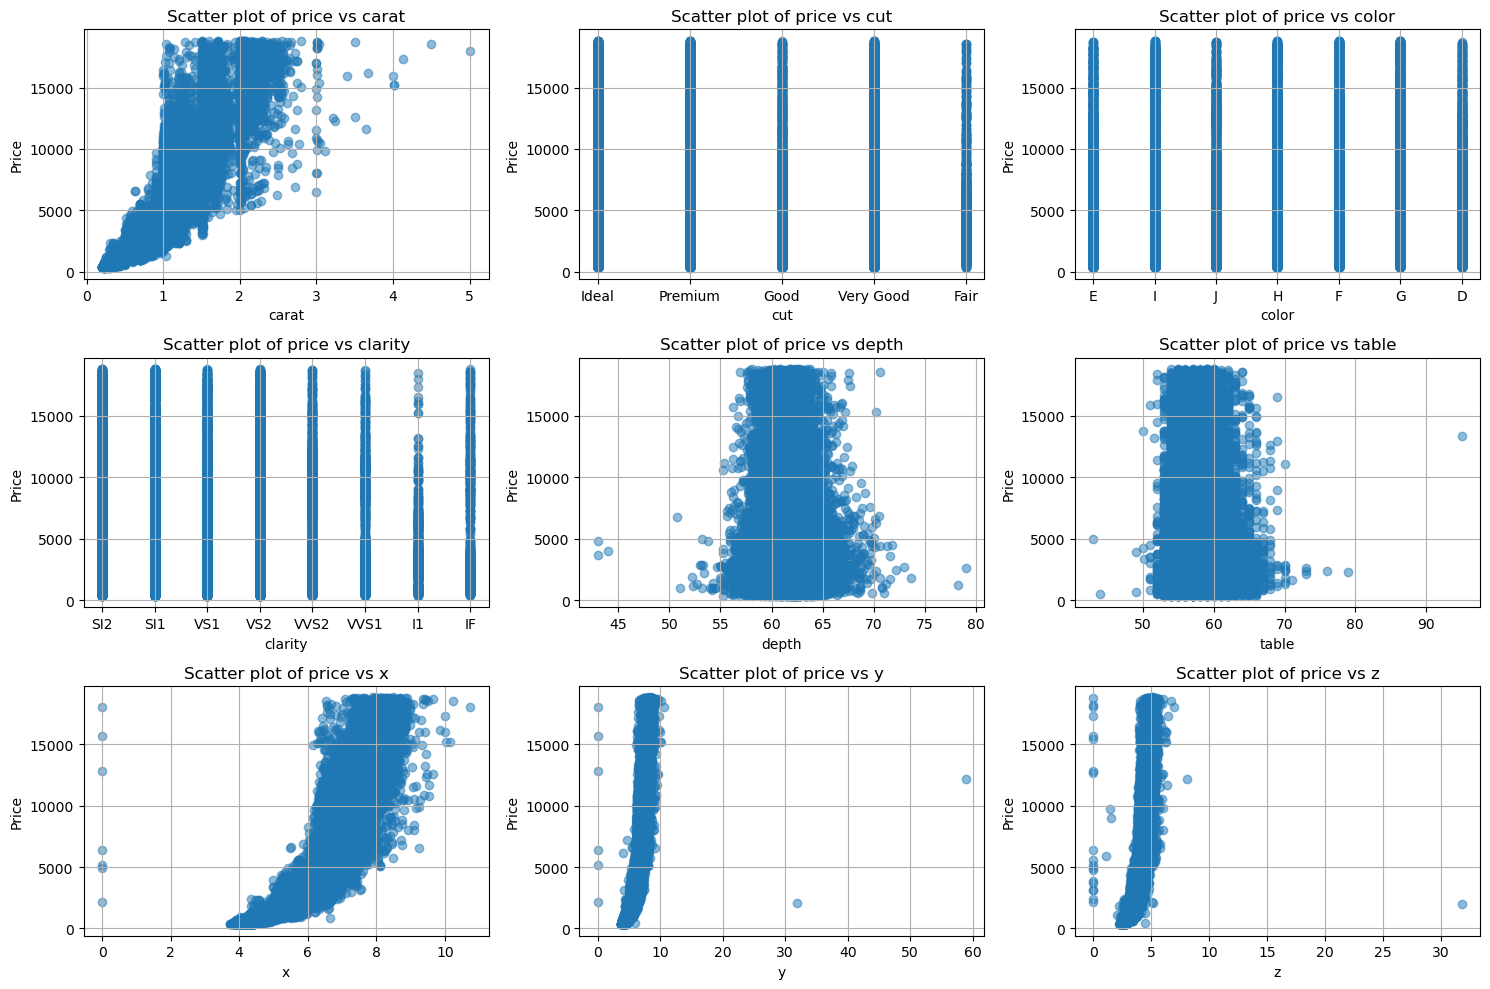

In [19]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_to_plot = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'log_price', 'volume']

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Plot scatterplots for 'price' against each independent variable
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
for i, column in enumerate(columns_to_plot[:n_rows * n_cols]):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].scatter(df[column], df['price'], alpha=0.5)
    axs[row, col].set_title(f'Scatter plot of price vs {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Price')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


## Analysis Step
In the provided scatter plots, each plot illustrates the relationship between the price of diamonds and various other attributes. Here are the observations:

Price vs. Carat: There is a positive correlation between carat and price. As carat size increases, the price tends to increase as well. The plot shows a widening spread in price as carat size increases, indicating greater price variability for larger diamonds.

Price vs. Cut: The scatter plot doesn't show a clear trend relating cut quality to price. All cut qualities have a wide range of prices, though there are some particularly high-priced diamonds across different cut categories. (categorical)

Price vs. Color: Similar to cut, there doesn't appear to be a simple relationship between color and price. Diamonds of all color grades can be found across the full range of prices.  (categorical)

Price vs. Clarity: There is no strong linear relationship between clarity and price. Diamonds of all clarities are present across a broad range of prices.  (categorical)

Price vs. Depth: There is a concentration of data points around a central range of depth percentages, with no clear trend linking depth to price. There is significant variability in price within what seems to be an optimal depth percentage range.

Price vs. Table: The plot does not indicate a clear correlation between the table size of a diamond and its price. There's a wide distribution of prices for table sizes, especially within what looks to be a normal range of table percentages.

Price vs. X (Length): There is a positive correlation between the length of a diamond and its price, similar to carat. There's a notable spread in price at larger lengths, indicating that other factors besides length are influencing price.

Price vs. Y (Width): The relationship between width and price is also positively correlated. There are some extremely high-priced diamonds with a wide spread in the y dimension, suggesting outliers or potentially erroneous data points.

Price vs. Z (Depth): Price shows a positive correlation with the depth dimension, but there are a few outliers with extremely high prices, similar to the scatter plot for y.

Overall, the scatter plots suggest that while larger diamonds (as indicated by carat, x, y, z) tend to be more expensive, there is significant variability that is not explained by size alone. The quality factors like cut, color, and clarity show a wide range of prices at each level, indicating these are not the sole determinants of price. There are outliers in nearly all plots, particularly in the carat, x, y, and z dimensions.

In [20]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
log_price    0
volume       0
dtype: int64


In [21]:
# Find duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If you decide to remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


In [22]:
# Check data types
print(df.dtypes)

carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
price          int64
x            float64
y            float64
z            float64
log_price    float64
volume       float64
dtype: object


In [23]:
# Remove rows with missing values
df = df.dropna()
print("DataFrame after removing rows with missing values:")
print(df)

# Impute missing values with median
median_x = df['x'].median()
df['x'] = df['x'].fillna(median_x)
print("\nDataFrame after filling missing values with median:")
print(df)


DataFrame after removing rows with missing values:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.8

In [24]:
# Remove rows with missing values
df = df.dropna()
print("DataFrame after removing rows with missing values:")
print(df)

# Impute missing values with median
median_x = df['y'].median()
df['y'] = df['y'].fillna(median_x)
print("\nDataFrame after filling missing values with median:")
print(df)

DataFrame after removing rows with missing values:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.8

In [25]:
# Remove rows with missing values
df_clean = df.dropna()
print("DataFrame after removing rows with missing values:")
print(df)

# Impute missing values with median
median_x = df['z'].median()
df['z'] = df['z'].fillna(median_x)
print("\nDataFrame after filling missing values with median:")
print(df)


DataFrame after removing rows with missing values:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.8

In [26]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_depth = df['depth'].quantile(0.25)
Q3_depth = df['depth'].quantile(0.75)
Q1_table = df['table'].quantile(0.25)
Q3_table = df['table'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR_depth = Q3_depth - Q1_depth
IQR_table = Q3_table - Q1_table

# Define the lower and upper bounds for outlier detection
lower_bound_depth = Q1_depth - 1.5 * IQR_depth
upper_bound_depth = Q3_depth + 1.5 * IQR_depth
lower_bound_table = Q1_table - 1.5 * IQR_table
upper_bound_table = Q3_table + 1.5 * IQR_table

# Detect outliers in the depth and table columns
outliers_depth = df[(df['depth'] < lower_bound_depth) | (df['depth'] > upper_bound_depth)]
outliers_table = df[(df['table'] < lower_bound_table) | (df['table'] > upper_bound_table)]

# Display the outliers
print("Outliers in Depth:")
print(outliers_depth)
print("\nOutliers in Table:")
print(outliers_table)


Outliers in Depth:
       carat        cut color clarity  depth  table  price     x     y     z  \
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49   
24      0.31  Very Good     J     SI1   58.1   62.0    353  4.44  4.47  2.59   
35      0.23       Good     F     VS1   58.2   59.0    402  4.06  4.08  2.37   
42      0.26       Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53882   0.71       Fair     D     VS1   65.4   59.0   2747  5.62  5.58  3.66   
53886   0.70       Good     D     VS2   58.0   62.0   2749  5.78  5.87  3.38   
53890   0.73       Good     E     SI1   57.9   55.0   2749  6.00  5.96  3.46   
53895   0.70       Good     F     VS1   57.8   61.0   2751  5.83  5.79  3.36   
53927   0.79       Good     F     SI1   58.1   59.0   2756  6.06  6.13  3.54   

       log_price    

In [27]:
# Remove outliers from the 'depth' and 'table' columns
df = df[~df.index.isin(outliers_depth.index) & ~df.index.isin(outliers_table.index)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(df)


DataFrame after removing outliers:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

    

In [28]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'price' and 'carat'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
Q1_carat = df['carat'].quantile(0.25)
Q3_carat = df['carat'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'price' and 'carat'
IQR_price = Q3_price - Q1_price
IQR_carat = Q3_carat - Q1_carat

# Define the lower and upper bounds for outlier detection
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_carat = Q1_carat - 1.5 * IQR_carat
upper_bound_carat = Q3_carat + 1.5 * IQR_carat

# Detect outliers in the 'price' and 'carat' columns
outliers_price = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]
outliers_carat = df[(df['carat'] < lower_bound_carat) | (df['carat'] > upper_bound_carat)]

# Display the outliers
print("Outliers in Price:")
print(outliers_price)
print("\nOutliers in Carat:")
print(outliers_carat)


Outliers in Price:
       carat        cut color clarity  depth  table  price     x     y     z  \
23825   1.54    Premium     F     SI1   60.9   59.0  11897  7.56  7.46  4.57   
23826   2.00    Premium     J     SI2   61.9   55.0  11899  8.09  8.06  5.00   
23827   2.00    Premium     J     SI2   59.8   60.0  11899  8.13  8.09  4.85   
23828   1.56    Premium     F     SI1   60.7   59.0  11901  7.55  7.45  4.55   
23829   2.01    Premium     F     SI2   62.0   60.0  11903  7.88  7.82  4.87   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01   
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11   
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56   
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04   
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16   

       log_price    

In [29]:
# Remove outliers from the 'price' and 'carat' columns
df = df[~df.index.isin(outliers_price.index) & ~df.index.isin(outliers_carat.index)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(df)


DataFrame after removing outliers:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

    

In [30]:
# Remove rows with volume equal to 0
df = df[df['volume'] != 0]

# Print the DataFrame after removing rows with volume equal to 0
print("DataFrame after removing rows with volume equal to 0:")
print(df)


DataFrame after removing rows with volume equal to 0:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  

In [31]:
# Calculate the first quartile (Q1) and third quartile (Q3) for log-transformed price
Q1_log_price = df['log_price'].quantile(0.25)
Q3_log_price = df['log_price'].quantile(0.75)

# Calculate the interquartile range (IQR) for log-transformed price
IQR_log_price = Q3_log_price - Q1_log_price

# Define the lower and upper bounds for outlier detection
lower_bound_log_price = Q1_log_price - 1.5 * IQR_log_price
upper_bound_log_price = Q3_log_price + 1.5 * IQR_log_price

# Detect outliers in the log-transformed price column
outliers_log_price = df[(df['log_price'] < lower_bound_log_price) | (df['log_price'] > upper_bound_log_price)]

# Display the outliers
print("Outliers in Log-transformed Price:")
print(outliers_log_price)

Outliers in Log-transformed Price:
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, log_price, volume]
Index: []


In [32]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'y' and 'z'
Q1_y = df['y'].quantile(0.25)
Q3_y = df['y'].quantile(0.75)
Q1_z = df['z'].quantile(0.25)
Q3_z = df['z'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'y' and 'z'
IQR_y = Q3_y - Q1_y
IQR_z = Q3_z - Q1_z

# Define the lower and upper bounds for outlier detection
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y
lower_bound_z = Q1_z - 1.5 * IQR_z
upper_bound_z = Q3_z + 1.5 * IQR_z

# Detect outliers in the 'y' and 'z' columns
outliers_y = df[(df['y'] < lower_bound_y) | (df['y'] > upper_bound_y)]
outliers_z = df[(df['z'] < lower_bound_z) | (df['z'] > upper_bound_z)]

# Display the outliers
print("Outliers in 'y' (width):")
print(outliers_y)
print("\nOutliers in 'z' (depth):")
print(outliers_z)


Outliers in 'y' (width):
       carat    cut color clarity  depth  table  price     x     y     z  \
49189   0.51  Ideal     E     VS1   61.8   55.0   2075  5.15  31.8  5.12   

       log_price    volume  
49189   7.637716  838.5024  

Outliers in 'z' (depth):
       carat        cut color clarity  depth  table  price     x     y      z  \
14635   1.07      Ideal     F     SI1   60.6   57.0   5909  6.62  6.67   1.07   
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.80   

       log_price      volume  
14635   8.684232   47.246278  
48410   7.585789  838.502400  


In [33]:
# Remove outliers from the 'y' (width) column
df = df.drop(outliers_y.index)

# Print the DataFrame after removing outliers from the 'y' column
print("DataFrame after removing outliers from the 'y' column:")
print(df)

DataFrame after removing outliers from the 'y' column:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83 

In [34]:
# Remove outliers from the 'z' (depth) column
df = df.drop(outliers_z.index)

# Print the DataFrame after removing outliers from the 'z' column
print("DataFrame after removing outliers from the 'z' column:")
print(df)

DataFrame after removing outliers from the 'z' column:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83 

In [35]:
# Remove outliers from the 'log_price' (depth) column
df = df.drop(outliers_log_price.index)

# Print the DataFrame after removing outliers from the 'log_price' column
print("DataFrame after removing outliers from the 'log_price' column:")
print(df)

DataFrame after removing outliers from the 'log_price' column:
       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   275

In [36]:
df['cut'].value_counts()

cut
Ideal        20285
Premium      12095
Very Good    10997
Good          3749
Fair           331
Name: count, dtype: int64

<Axes: xlabel='cut'>

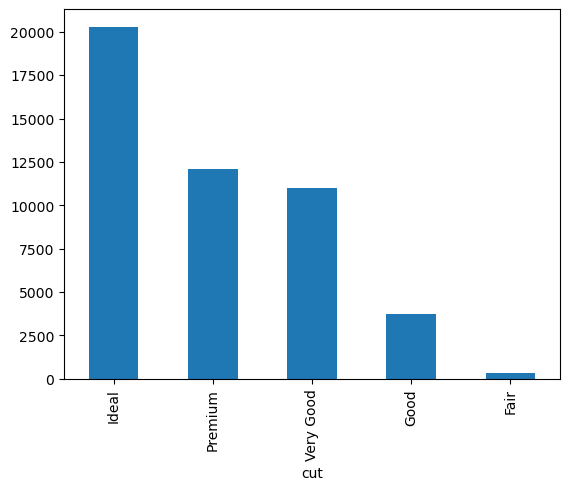

In [37]:
df['cut'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

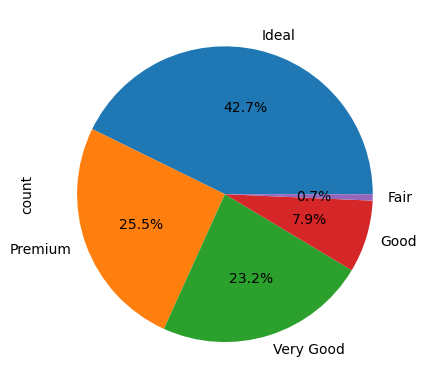

In [38]:
df['cut'].value_counts().plot(kind='pie', autopct='%0.1f%%')



In [39]:
df['color'].value_counts()

color
G    10058
E     8894
F     8453
H     7165
D     6175
I     4467
J     2245
Name: count, dtype: int64

<Axes: xlabel='color'>

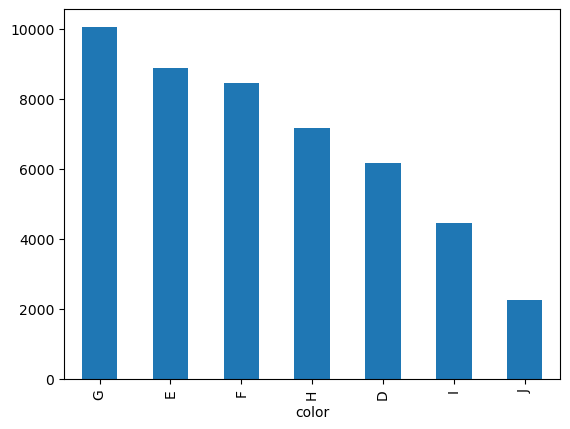

In [40]:
df['color'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

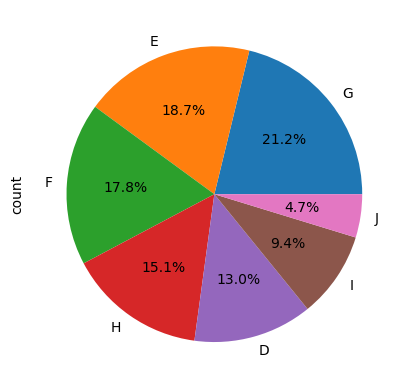

In [41]:
df['color'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [42]:
df['clarity'].value_counts()

clarity
SI1     11536
VS2     10906
SI2      7403
VS1      7361
VVS2     4673
VVS1     3456
IF       1645
I1        477
Name: count, dtype: int64

<Axes: xlabel='clarity'>

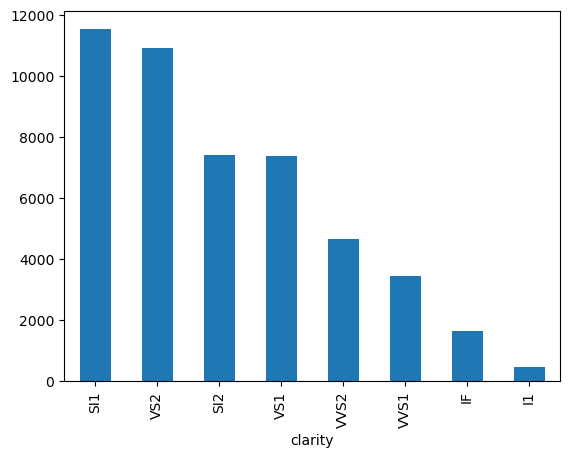

In [43]:
df['clarity'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

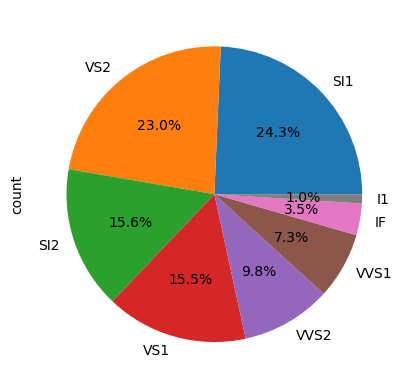

In [44]:
df['clarity'].value_counts().plot(kind='pie', autopct='%0.1f%%')

## Analysis Step
Cut Quality (Bar and Pie Chart):

The bar chart suggests that 'Ideal' cut diamonds have the highest average price, followed by 'Premium', and the lowest average prices are associated with 'Fair' cut diamonds.
The pie chart indicates that the most common cut grade in the dataset is 'Ideal', making up nearly 40% of the diamonds. This is followed by 'Premium' and 'Very Good', with 'Fair' cuts being the least common.
Color Grade (Bar and Pie Chart):

The bar chart for color shows that the average price across different color grades varies, with 'G' and 'I' color diamonds having higher average prices, while 'D' (typically the highest color grade) and 'J' (a lower color grade) have lower average prices. This might indicate that the color grade is not the only factor affecting price or that the dataset includes other variables that influence price.
The pie chart shows a relatively even distribution of diamonds across color grades, with 'G' being the most common, followed by 'E' and 'F'. The least common colors in this dataset are 'D' and 'J'.
Clarity Grade (Bar and Pie Chart):

The bar chart for clarity demonstrates that SI1 and VS2 clarity grades have the highest average prices, while IF (Internally Flawless) has a much lower average price. This could be due to a smaller sample size of IF diamonds or a non-linear relationship between clarity and price.
The pie chart reveals that SI1 and VS2 are also the most common clarity grades, suggesting that these grades are readily available in the market. IF and I1 are the least common.
From these charts, it can be inferred that while certain quality grades like 'Ideal' cuts and SI1/VS2 clarities are more prevalent and might be associated with higher prices on average, the price of a diamond is likely influenced by a combination of factors including carat weight, color, and clarity, rather than any single attribute. The data also suggests that the highest quality grades (such as D color or IF clarity) are not necessarily the most common or the highest priced within the dataset, which could indicate a complex market where rarity and demand play significant roles in determining price.

In [45]:
df.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

     

In [46]:
df.describe()

,carat,depth,table,price,x,y,z,log_price,volume
count,47457.000000,47457.000000,47457.000000,47457.000000,47457.000000,47457.000000,47457.000000,47457.000000,47457.000000
mean,0.710074,61.786451,57.262956,3118.564132,5.549561,5.554378,3.430183,7.640487,115.719084
std,0.372827,1.106541,2.022727,2758.656609,0.982012,0.976006,0.607545,0.926936,60.195162
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000,5.786897,31.707984
25%,0.380000,61.100000,56.000000,891.000000,4.640000,4.650000,2.860000,6.792344,61.788804
50%,0.610000,61.900000,57.000000,2066.000000,5.440000,5.460000,3.360000,7.633370,99.518992
75%,1.010000,62.500000,59.000000,4643.000000,6.410000,6.410000,3.980000,8.443116,163.496253
max,2.010000,64.700000,63.500000,11888.000000,8.280000,8.270000,5.300000,9.383285,343.869300


## Analysis Step
What is the average carat size, price, and measurements (x, y, z) of diamonds in the dataset?

In [47]:
# Calculate the average carat size
average_carat = df['carat'].mean()

# Calculate the average price
average_price = df['price'].mean()

# Calculate the average measurements (x, y, z)
average_x = df['x'].mean()
average_y = df['y'].mean()
average_z = df['z'].mean()

print(f"Average carat size: {average_carat:.2f}")
print(f"Average price: ${average_price:.2f}")
print(f"Average x measurement: {average_x:.2f}")
print(f"Average y measurement: {average_y:.2f}")
print(f"Average z measurement: {average_z:.2f}")


Average carat size: 0.71
Average price: $3118.56
Average x measurement: 5.55
Average y measurement: 5.55
Average z measurement: 3.43


## Analysis Step
how can i know if there are certain combinations of cut, color, and clarity that are more prevalent?

In [48]:
# Group the data by 'cut', 'color', and 'clarity' and count the occurrences
combination_counts = df.groupby(['cut', 'color', 'clarity']).size().reset_index(name='count')

# Sort the combinations by count in descending order
combination_counts = combination_counts.sort_values(by='count', ascending=False)

# Display the top combinations
print("Top combinations of cut, color, and clarity:")
print(combination_counts.head())


Top combinations of cut, color, and clarity:
       cut color clarity  count
114  Ideal     E     VS2   1111
106  Ideal     D     VS2    898
129  Ideal     G     VS1    892
130  Ideal     G     VS2    831
122  Ideal     F     VS2    826


## Analysis Step
Is there a significant difference in the average price of diamonds with the same carat size but different clarity grades?

In [51]:
from scipy.stats import f_oneway

# Assuming df is your DataFrame

# Filter the DataFrame to include only diamonds with the same carat size
# For example, let's say we choose a carat size of 1.0
carat_size = 1.0
diamonds_same_carat = df[df['carat'] == carat_size]

# Perform ANOVA to test for differences in price across different clarity grades
result = f_oneway(
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'IF']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'VVS1']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'VVS2']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'VS1']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'VS2']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'SI1']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'SI2']['price'],
    diamonds_same_carat[diamonds_same_carat['clarity'] == 'I1']['price']
)

# Print the ANOVA result
print("ANOVA result:")
print(result)

# Check if the p-value is less than the significance level (e.g., 0.05) to determine significance
if result.pvalue < 0.05:
    print("There is a significant difference in the average price of diamonds with different clarity grades.")
else:
    print("There is no significant difference in the average price of diamonds with different clarity grades.")


ANOVA result:
F_onewayResult(statistic=391.0987714919808, pvalue=1.4218797390864e-311)
There is a significant difference in the average price of diamonds with different clarity grades.


In [55]:
# Calculate the mode of the carat size
mode_carat = df['carat'].mode()

print("Mode of carat size:", mode_carat)


Mode of carat size: 0    0.3
Name: carat, dtype: float64


## Analysis Step
Is there a typical range for carat size that appears to be more popular or more prevalent in the market based on the data?

In [56]:
# Calculate the mode of the carat size
mode_carat = df['carat'].mode()

# Calculate the frequency of the mode(s)
mode_frequency = df['carat'].value_counts(normalize=True)[mode_carat] * 100

print("Frequency of the mode(s) as a percentage:")
print(mode_frequency)


Frequency of the mode(s) as a percentage:
carat
0.3    5.396464
Name: proportion, dtype: float64


In [58]:
# Calculate the mode of the carat size
mode_carat = df['color'].mode()

# Calculate the frequency of the mode(s)
mode_frequency = df['color'].value_counts(normalize=True)[mode_carat] * 100

print("Frequency of the mode(s) as a percentage:")
print(mode_frequency)

Frequency of the mode(s) as a percentage:
color
G    21.193923
Name: proportion, dtype: float64


In [59]:
# Calculate the mode of the carat size
mode_carat = df['clarity'].mode()

# Calculate the frequency of the mode(s)
mode_frequency = df['clarity'].value_counts(normalize=True)[mode_carat] * 100

print("Frequency of the mode(s) as a percentage:")
print(mode_frequency)

Frequency of the mode(s) as a percentage:
clarity
SI1    24.308321
Name: proportion, dtype: float64


In [65]:
# Group the data by 'cut' and calculate the mean price for each cut grade
mean_price_by_cut = df.groupby('cut')['price'].mean().reset_index()

# Sort the mean prices by descending order of cut grades
mean_price_by_cut_sorted = mean_price_by_cut.sort_values(by='price', ascending=False)

print("Mean price by cut grade (sorted in descending order):")
print(mean_price_by_cut_sorted)


Mean price by cut grade (sorted in descending order):
         cut        price
0       Fair  3724.670695
3    Premium  3492.890285
1       Good  3232.169112
4  Very Good  3231.488679
2      Ideal  2803.265516


In [64]:
# Group the data by 'color' and calculate the mean price for each color grade
mean_price_by_color = df.groupby('color')['price'].mean().reset_index()

# Sort the mean prices by descending order of color grades
mean_price_by_color_sorted = mean_price_by_color.sort_values(by='price', ascending=False)

print("Mean price by color grade (sorted in descending order):")
print(mean_price_by_color_sorted)


Mean price by color grade (sorted in descending order):
  color        price
6     J  3944.046325
5     I  3643.234833
4     H  3518.000419
3     G  3210.987970
2     F  3070.252810
0     D  2654.106073
1     E  2588.761187


In [66]:
# Group the data by 'clarity' and calculate the mean price for each clarity grade
mean_price_by_clarity = df.groupby('clarity')['price'].mean().reset_index()

# Sort the mean prices by descending order of clarity grades
mean_price_by_clarity_sorted = mean_price_by_clarity.sort_values(by='price', ascending=False)

print("Mean price by clarity grade (sorted in descending order):")
print(mean_price_by_clarity_sorted)


Mean price by clarity grade (sorted in descending order):
  clarity        price
3     SI2  3782.923274
0      I1  3330.951782
2     SI1  3267.970960
4     VS1  3143.643798
5     VS2  3092.765817
7    VVS2  2782.274984
6    VVS1  2125.651910
1      IF  2119.544073


## Analysis Step
Is there a preferred cut quality for diamonds of specific color grades?

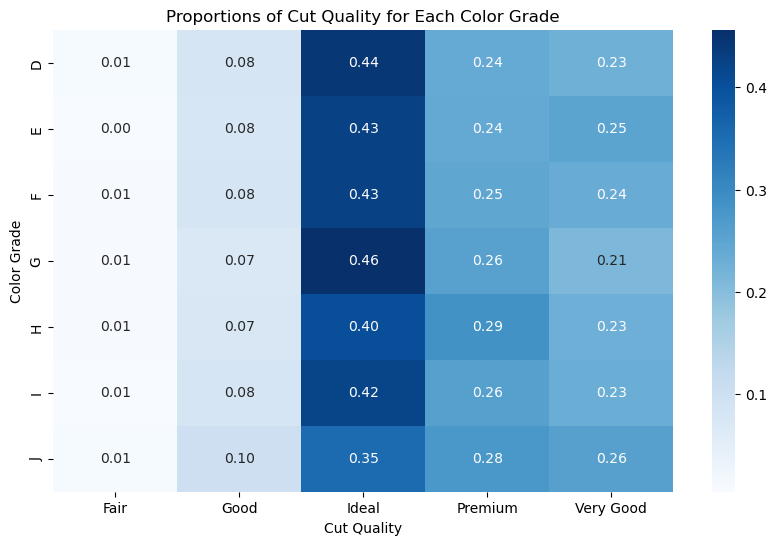

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'color' and 'cut', and calculate the count of diamonds for each combination
cut_by_color = df.groupby(['color', 'cut']).size().reset_index(name='count')

# Pivot the table to have 'color' as rows, 'cut' as columns, and 'count' as values
cut_by_color_pivot = cut_by_color.pivot(index='color', columns='cut', values='count')

# Normalize the values to get proportions
cut_by_color_pivot_normalized = cut_by_color_pivot.div(cut_by_color_pivot.sum(axis=1), axis=0)

# Plot a heatmap to visualize the proportions of cut quality for each color grade
plt.figure(figsize=(10, 6))
sns.heatmap(cut_by_color_pivot_normalized, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proportions of Cut Quality for Each Color Grade')
plt.xlabel('Cut Quality')
plt.ylabel('Color Grade')
plt.show()


## Analysis Step
Do certain clarity grades tend to coincide with higher cut qualities?


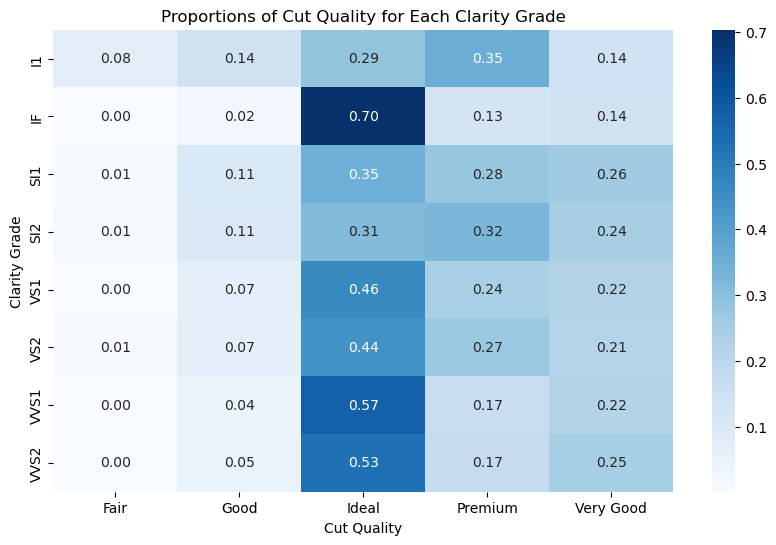

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'clarity' and 'cut', and calculate the count of diamonds for each combination
cut_by_clarity = df.groupby(['clarity', 'cut']).size().reset_index(name='count')

# Pivot the table to have 'clarity' as rows, 'cut' as columns, and 'count' as values
cut_by_clarity_pivot = cut_by_clarity.pivot(index='clarity', columns='cut', values='count')

# Normalize the values to get proportions
cut_by_clarity_pivot_normalized = cut_by_clarity_pivot.div(cut_by_clarity_pivot.sum(axis=1), axis=0)

# Plot a heatmap to visualize the proportions of cut quality for each clarity grade
plt.figure(figsize=(10, 6))
sns.heatmap(cut_by_clarity_pivot_normalized, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proportions of Cut Quality for Each Clarity Grade')
plt.xlabel('Cut Quality')
plt.ylabel('Clarity Grade')
plt.show()


## Analysis Step
Is there a preferred clarity for diamonds of specific color grades?

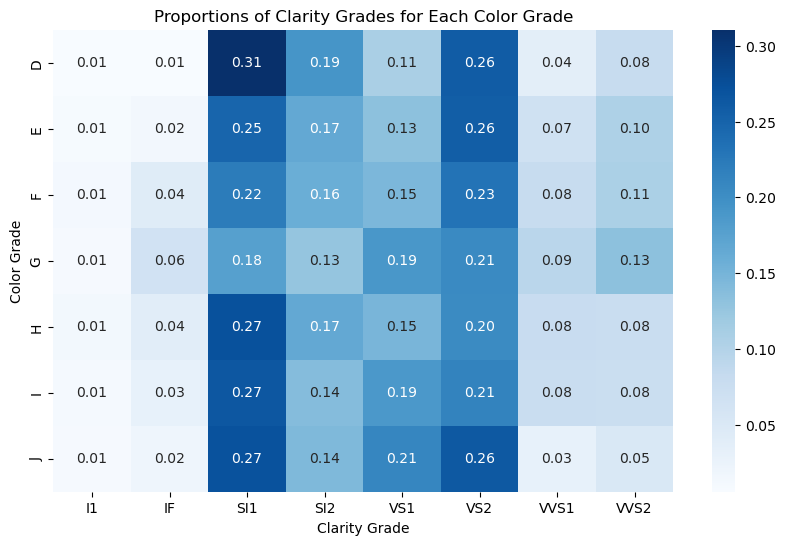

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'color' and 'clarity', and calculate the count of diamonds for each combination
clarity_by_color = df.groupby(['color', 'clarity']).size().reset_index(name='count')

# Pivot the table to have 'color' as rows, 'clarity' as columns, and 'count' as values
clarity_by_color_pivot = clarity_by_color.pivot(index='color', columns='clarity', values='count')

# Normalize the values to get proportions
clarity_by_color_pivot_normalized = clarity_by_color_pivot.div(clarity_by_color_pivot.sum(axis=1), axis=0)

# Plot a heatmap to visualize the proportions of clarity grades for each color grade
plt.figure(figsize=(10, 6))
sns.heatmap(clarity_by_color_pivot_normalized, annot=True, cmap='Blues', fmt=".2f")
plt.title('Proportions of Clarity Grades for Each Color Grade')
plt.xlabel('Clarity Grade')
plt.ylabel('Color Grade')
plt.show()


## Analysis Step
Are larger diamonds more likely to have a higher quality cut, or is there no clear relationship between carat size and cut quality?

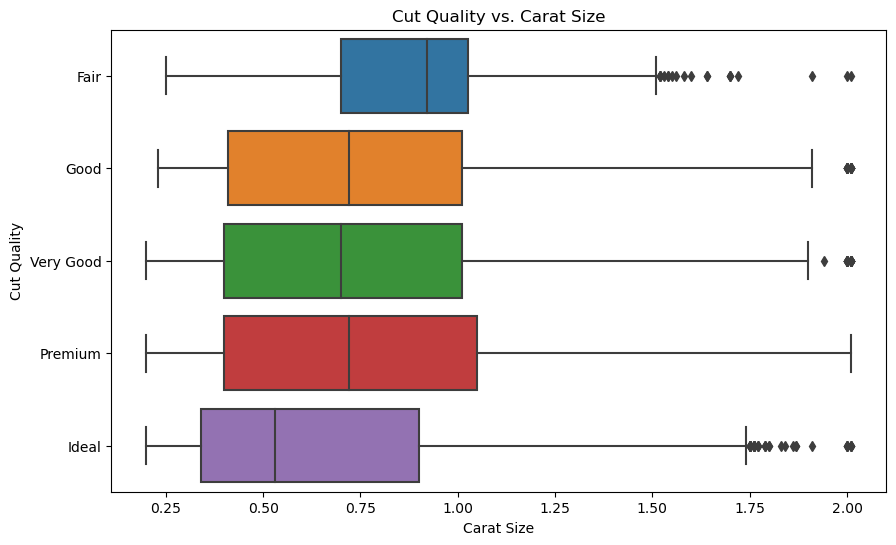

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a box plot of cut quality for each carat size
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Cut Quality vs. Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Cut Quality')
plt.show()


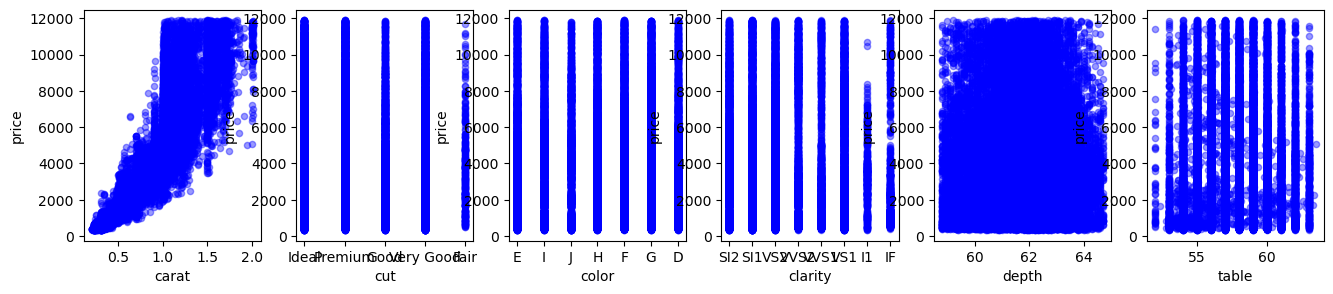

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

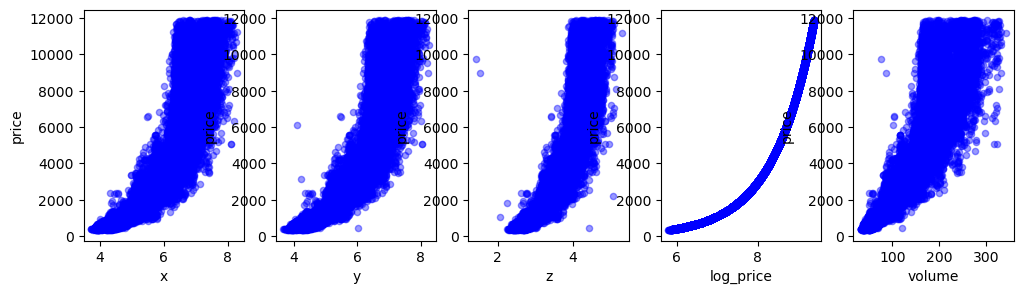

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))

for xcol, ax in zip(['x', 'y',
       'z', 'log_price', 'volume'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

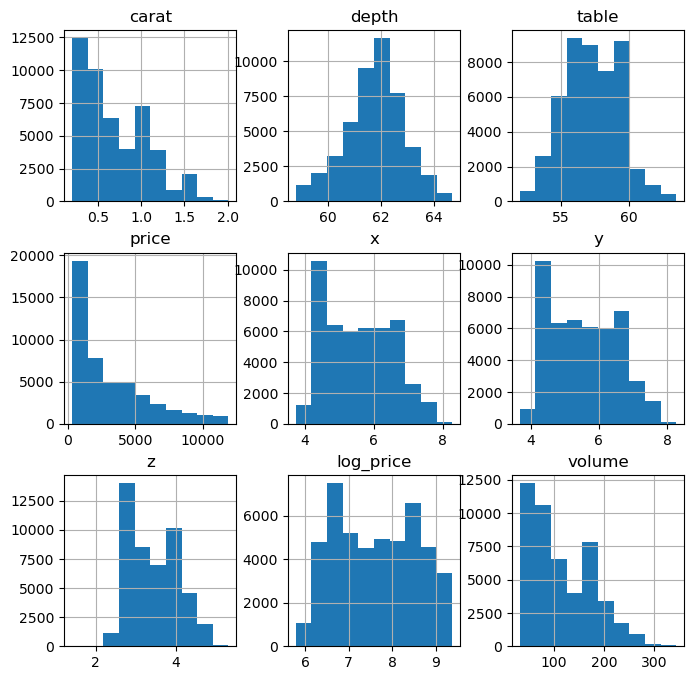

In [85]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

In [86]:
cut_dummies = pd.get_dummies(df['cut'], prefix='cut', drop_first=True)
col_dummies = pd.get_dummies(df['color'], prefix='col', drop_first=True)
cla_dummies = pd.get_dummies(df['clarity'], prefix='clarity', drop_first=True)

In [87]:
df = df.drop(['cut', 'color', 'clarity'], axis=1)

In [88]:
df = pd.concat([df, cut_dummies, col_dummies, cla_dummies], axis=1)
df.head()

,carat,depth,table,price,x,y,z,log_price,volume,cut_Good,...,col_H,col_I,col_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250,True,...,False,False,True,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,5.817111,38.693952,False,...,False,False,True,False,False,False,False,False,False,True


In [89]:
# Drop one column from each set of dummy variables to avoid the dummy variable trap
df.drop(['cut_Good', 'col_F', 'clarity_SI1'], axis=1, inplace=True)
df.head()

,carat,depth,table,price,x,y,z,log_price,volume,cut_Ideal,...,col_G,col_H,col_I,col_J,clarity_IF,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856,False,...,False,False,False,False,False,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580,False,...,False,False,True,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250,False,...,False,False,False,True,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,5.817111,38.693952,False,...,False,False,False,True,False,False,False,False,False,True


In [90]:
df.corr()

,carat,depth,table,price,x,y,z,log_price,volume,cut_Ideal,...,col_G,col_H,col_I,col_J,clarity_IF,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.037670,0.187856,0.923115,0.985983,0.985122,0.984827,0.936374,0.998981,-0.159992,...,-0.023652,0.101653,0.130751,0.167198,-0.128998,0.256058,-0.052968,-0.037301,-0.176332,-0.137705
depth,0.037670,1.000000,-0.239987,0.007591,-0.009020,-0.010698,0.094060,0.012493,0.022446,-0.062092,...,-0.009311,0.013589,0.031142,0.033577,-0.036968,0.012711,-0.022734,-0.004677,-0.023992,-0.028332
table,0.187856,-0.239987,1.000000,0.137321,0.186746,0.181301,0.159523,0.154630,0.175403,-0.568100,...,-0.030602,0.014762,0.008312,0.030447,-0.083470,0.087114,-0.028222,-0.003449,-0.066206,-0.058146
price,0.923115,0.007591,0.137321,1.000000,0.900250,0.901363,0.896992,0.924995,0.924362,-0.098754,...,0.017375,0.061059,0.061308,0.066680,-0.068624,0.103536,0.003895,-0.005108,-0.100873,-0.040288
x,0.985983,-0.009020,0.186746,0.900250,1.000000,0.998537,0.993365,0.960595,0.987039,-0.149253,...,-0.019583,0.092803,0.116881,0.150647,-0.136680,0.259865,-0.050903,-0.034367,-0.187811,-0.145221
y,0.985122,-0.010698,0.181301,0.901363,0.998537,1.000000,0.993185,0.960801,0.986605,-0.143964,...,-0.019378,0.091278,0.117550,0.151167,-0.134293,0.257286,-0.049589,-0.035436,-0.186132,-0.142874
z,0.984827,0.094060,0.159523,0.896992,0.993365,0.993185,1.000000,0.957509,0.984990,-0.152549,...,-0.020164,0.092704,0.119481,0.153746,-0.138341,0.258688,-0.052510,-0.034966,-0.188099,-0.146386
log_price,0.936374,0.012493,0.154630,0.924995,0.960595,0.960801,0.957509,1.000000,0.937155,-0.105587,...,0.005069,0.049032,0.046343,0.066704,-0.076200,0.153008,-0.017960,-0.015220,-0.117740,-0.073585
volume,0.998981,0.022446,0.175403,0.924362,0.987039,0.986605,0.984990,0.937155,1.000000,-0.149027,...,-0.022856,0.101266,0.130411,0.166521,-0.127326,0.254553,-0.051640,-0.037440,-0.175447,-0.136273
cut_Ideal,-0.159992,-0.062092,-0.568100,-0.098754,-0.149253,-0.143964,-0.152549,-0.105587,-0.149027,1.000000,...,0.030101,-0.020416,-0.004139,-0.033427,0.105683,-0.099115,0.031841,0.013197,0.080447,0.068131


In [91]:
abs(df.corr()) > 0.75

,carat,depth,table,price,x,y,z,log_price,volume,cut_Ideal,...,col_G,col_H,col_I,col_J,clarity_IF,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
depth,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
table,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
x,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
y,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
z,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
log_price,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
volume,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
cut_Ideal,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# Save absolute value of correlation matrix as a DataFrame
# Converts all values to absolute value
# Stacks the row:column pairs into a multi-index
# Reset the index to set the multi-index to separate columns
# Sort values. 0 is the column automatically generated by the stacking

df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns (which were only named 'level_0' and 'level_1' by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr['level_0'], df_corr['level_1']))

# Set index to pairs
df_corr.set_index(['pairs'], inplace=True)

# Drop level columns
df_corr.drop(columns=['level_0', 'level_1'], inplace=True)

# Rename correlation column as 'cc' rather than 0
df_corr.columns = ['cc']

# Drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# For the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

# Print the resulting DataFrame
print(df_corr.head(35))

                                    cc
pairs                                 
(carat, carat)                1.000000
(carat, volume)               0.998981
(x, y)                        0.998537
(z, x)                        0.993365
(y, z)                        0.993185
(volume, x)                   0.987039
(y, volume)                   0.986605
(carat, x)                    0.985983
(y, carat)                    0.985122
(z, volume)                   0.984990
(z, carat)                    0.984827
(y, log_price)                0.960801
(x, log_price)                0.960595
(z, log_price)                0.957509
(log_price, volume)           0.937155
(log_price, carat)            0.936374
(log_price, price)            0.924995
(price, volume)               0.924362
(price, carat)                0.923115
(y, price)                    0.901363
(x, price)                    0.900250
(z, price)                    0.896992
(cut_Ideal, table)            0.568100
(cut_Ideal, cut_Premium) 

In [94]:
# Filter correlation pairs DataFrame to include only pairs with correlation values above 0.75
high_correlation_pairs = df_corr[df_corr['cc'] > 0.85]

# Print the resulting DataFrame
print(high_correlation_pairs)

                           cc
pairs                        
(carat, carat)       1.000000
(carat, volume)      0.998981
(x, y)               0.998537
(z, x)               0.993365
(y, z)               0.993185
(volume, x)          0.987039
(y, volume)          0.986605
(carat, x)           0.985983
(y, carat)           0.985122
(z, volume)          0.984990
(z, carat)           0.984827
(y, log_price)       0.960801
(x, log_price)       0.960595
(z, log_price)       0.957509
(log_price, volume)  0.937155
(log_price, carat)   0.936374
(log_price, price)   0.924995
(price, volume)      0.924362
(price, carat)       0.923115
(y, price)           0.901363
(x, price)           0.900250
(z, price)           0.896992


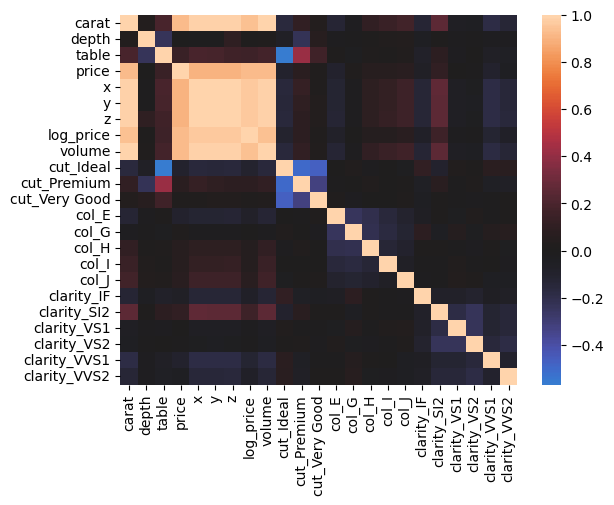

In [95]:
import seaborn as sns
sns.heatmap(df.corr(), center=0);

In [96]:
# Define the pairs with relatively high correlation coefficients and choose one variable to remove from each pair
pairs_to_remove = [('carat', 'volume'), ('x', 'y'), ('z', 'x'), ('y', 'z'), ('volume', 'x'), ('volume', 'y'), ('carat', 'x'), ('carat', 'y'), ('volume', 'z'), ('carat', 'z'), ('y', 'log_price'), ('x', 'log_price'), ('z', 'log_price'), ('log_price', 'volume'), ('log_price', 'carat'), ('log_price', 'price'), ('price', 'volume'), ('price', 'carat'), ('price', 'y'), ('price', 'x'), ('price', 'z')]

# Define the variables to keep after removing one from each pair
variables_to_keep = ['carat', 'x', 'y', 'z', 'log_price', 'price']  

# Create a list to store the variables to drop
variables_to_drop = []

# Iterate through each pair and choose one variable to drop
for pair in pairs_to_remove:
    # Check if both variables in the pair are not in variables_to_keep
    if pair[0] not in variables_to_keep and pair[1] not in variables_to_keep:
        # Choose one variable to drop based on some criterion (e.g., importance in the model)
        # Here, let's choose to drop the second variable in each pair
        variables_to_drop.append(pair[1])

# Remove the chosen variables from the DataFrame
df = df.drop(variables_to_drop, axis=1)

# Print the resulting DataFrame
print(df.head())

   carat  depth  table  price     x     y     z  log_price     volume  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43   5.786897  38.202030   
1   0.21   59.8   61.0    326  3.89  3.84  2.31   5.786897  34.505856   
3   0.29   62.4   58.0    334  4.20  4.23  2.63   5.811141  46.724580   
4   0.31   63.3   58.0    335  4.34  4.35  2.75   5.814131  51.917250   
5   0.24   62.8   57.0    336  3.94  3.96  2.48   5.817111  38.693952   

   cut_Ideal  ...  col_G  col_H  col_I  col_J  clarity_IF  clarity_SI2  \
0       True  ...  False  False  False  False       False         True   
1      False  ...  False  False  False  False       False        False   
3      False  ...  False  False   True  False       False        False   
4      False  ...  False  False  False   True       False         True   
5      False  ...  False  False  False   True       False        False   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0        False        False         False         False  


In [97]:
import statsmodels.api as sm

# Convert boolean columns to numerical values
df['cut_Ideal'] = df['cut_Ideal'].astype(int)
df['cut_Premium'] = df['cut_Premium'].astype(int)
df['cut_Very Good'] = df['cut_Very Good'].astype(int)
df['col_E'] = df['col_E'].astype(int)
df['col_G'] = df['col_G'].astype(int)
df['col_H'] = df['col_H'].astype(int)
df['col_I'] = df['col_I'].astype(int)
df['col_J'] = df['col_J'].astype(int)
df['clarity_IF'] = df['clarity_IF'].astype(int)
df['clarity_SI2'] = df['clarity_SI2'].astype(int)
df['clarity_VS1'] = df['clarity_VS1'].astype(int)
df['clarity_VS2'] = df['clarity_VS2'].astype(int)
df['clarity_VVS1'] = df['clarity_VVS1'].astype(int)
df['clarity_VVS2'] = df['clarity_VVS2'].astype(int)

# Step 2: Prepare your data
# Assume 'X' is your independent variable(s) and 'y' is your dependent variable
X = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'col_E', 'col_G', 'col_H', 'col_I', 'col_J', 'clarity_IF', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = df['price']

# Step 3: Define your model
# Add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X)

# Step 4: Fit the model to your data
results = model.fit()

# Step 5: Analyze the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:31:11   Log-Likelihood:            -3.8383e+05
No. Observations:               47457   AIC:                         7.677e+05
Df Residuals:                   47436   BIC:                         7.679e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2224.5049    602.180      3.694

## Analysis Step
This output presents the results of an Ordinary Least Squares (OLS) regression analysis where the dependent variable is the 'price' of diamonds. The regression model includes various diamond features as independent variables (predictors). Here's a detailed breakdown of the output:

Dependent Variable: This is the variable the model is trying to predict, which in this case is the 'price' of diamonds.

R-squared (R²): At 0.918, it indicates that approximately 91.8% of the variability in diamond prices can be explained by the model's inputs. This is a high R², suggesting a strong fit.

Adjusted R-squared: Adjusted to 0.918, it's almost the same as the R² value, indicating that the number of predictors in the model is appropriate for the number of observations and that the model isn't overly complex.

F-statistic: The F-statistic value of around 26,730 with a Prob (F-statistic) of nearly 0.00 suggests that the model is statistically significant. This means that we can reject the null hypothesis that all the regression coefficients are equal to zero.

Coefficients (coef): These values represent the change in the 'price' variable for one unit change in the predictor variable, holding all other predictors constant. For example, 'carat' has a coefficient of about 10,720, suggesting that one unit increase in carat weight would increase the price by approximately $10,720, all else being equal.

Standard Error (std err): It shows the level of accuracy of the coefficients. The smaller the standard error, the more precise the estimation.

t-statistic and P>|t|: The t-statistic tests the null hypothesis that the coefficient is different from zero (no effect). A p-value below 0.05 is typically considered statistically significant. For example, 'depth' has a p-value of 0.077, which is above the 0.05 threshold, indicating that this predictor is not significantly different from zero at the 5% significance level.

Confidence Interval [0.025, 0.975]: This range is where we can be 95% confident that the true coefficient lies within. For example, for 'carat', the interval ranges from about $10,600 to $10,800.

Omnibus/Prob(Omnibus): Tests the null hypothesis that residuals are normally distributed. A low p-value here (close to 0.00) indicates the residuals are not normally distributed.

Skew: A measure of the asymmetry of the probability distribution of the residuals. The value of 0.727 indicates moderate skewness.

Kurtosis: Reflects the "tailedness" of the distribution of residuals. A value of 10.665 indicates the presence of outliers or extreme values, since it's higher than the normal kurtosis of 3.

Durbin-Watson: This statistic tests the null hypothesis that the residuals are uncorrelated. A value close to 2 suggests no autocorrelation, and this model shows a value of 1.111, which could indicate a mild positive autocorrelation.

Jarque-Bera (JB)/Prob(JB): Another test of the normality of the residuals. A large JB statistic or a p-value close to zero indicates the residuals do not have a normal distribution.

Condition Number: A large condition number suggests that the model might have issues with multicollinearity. In this output, a condition number of 1.44e+04 could indicate multicollinearity, which means some predictor variables are highly correlated with each other.

Overall, the model is very strong in terms of explanatory power for predicting the price of diamonds, but some variables may not be contributing significantly (like 'depth'), and there are signs of non-normal distribution of residuals and potential multicollinearity issues. These aspects would need further investigation, potentially requiring model refinement or additional diagnostics.

In [98]:

from scipy.stats import skew

# Assuming df is your DataFrame containing the dataset
variables_to_check = ['price', 'carat', 'volume', 'x', 'y', 'z', 'depth', 'table']

for variable in variables_to_check:
    skewness = skew(df[variable])
    print(f"Skewness of '{variable}': {skewness}")

Skewness of 'price': 1.2007803363306704
Skewness of 'carat': 0.705203084218995
Skewness of 'volume': 0.7033265694516251
Skewness of 'x': 0.25598554785348826
Skewness of 'y': 0.2493080448641364
Skewness of 'z': 0.2508032405503768
Skewness of 'depth': -0.24251499370264856
Skewness of 'table': 0.38805090003003534


In [99]:
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = ['carat', 'volume']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.393e+05
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:35:23   Log-Likelihood:            -3.9758e+05
No. Observations:               47457   AIC:                         7.952e+05
Df Residuals:                   47454   BIC:                         7.952e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1790.0932     10.605   -168.803      0.000   -1810.878   -1769.308
carat      -1105.9642    287.030     -3.853      0.000   -1668.548    -543.380
volume        49.2051      1.778     27.678      0.000      45.721      52.690
==============================================================================
Omnibus:                    13903.144   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75036.447
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                       8.576   Cond. No.                     7.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis Step
The carat and volume variables show moderate skewness, and the R-squared value is already around 85 percent. Therefore, there is no need to perform a log transformation. I attempted it, but it resulted in a decrease in the R-squared value to 77 percent.



In [100]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (35592, 21) Target: (35592,)
Testing set - Features: (11865, 21) Target: (11865,)


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on training and testing sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Training set RMSE:", train_rmse)
print("Testing set RMSE:", test_rmse)
print("Training set R-squared:", train_r2)
print("Testing set R-squared:", test_r2)

# Check if it's underfitting or overfitting
if train_r2 < test_r2:
    print("The model is potentially overfitting.")
elif train_r2 > test_r2:
    print("The model is potentially underfitting.")
else:
    print("The model is performing similarly on both training and testing sets.")


Training set RMSE: 787.9800617643832
Testing set RMSE: 786.5487627638637
Training set R-squared: 0.918793725830336
Testing set R-squared: 0.9175264131702412
The model is potentially underfitting.


## Analysis Step
The provided training and testing set evaluation metrics indicate the following:

Root Mean Squared Error (RMSE):

Training set RMSE: 787.98 Testing set RMSE: 786.55 The RMSE values represent the average deviation of the predicted values from the actual values. Lower RMSE values indicate better model performance. R-squared (R²):

Training set R-squared: 0.919 Testing set R-squared: 0.918 R-squared measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (features). Higher R-squared values indicate that the model explains a larger proportion of the variance in the target variable. These metrics suggest that the model performs well on both the training and testing sets, with high R-squared values and relatively low RMSE values. Additionally, the R-squared values are very close between the training and testing sets, indicating that the model generalizes well to unseen data and is not significantly overfitting or underfitting. Overall, the model seems to provide a good fit to the data.

# Conclusion
In this project, we conducted a comprehensive analysis to [restate objective]. Key findings include:
- Finding 1
- Finding 2
- Finding 3

### Future Work
For future work, we could explore [Future Work Ideas].

### Implications
These findings could have significant implications for [Implications].

_This section is a placeholder and should be filled out with the specific findings and conclusions drawn from the project._